### Nearest Neighbor Classification

k-Nearest Neighbors (k-NN) is one of the simplest machine learning algorithms. Predictions for the new data points are done by closest data points in the training data set. The algorithm compares the Euclidean distances from the point of interest to the other data points to determine which class it belongs to. We can define the k-amount of the closest data points for the algorithm calculations.

Lower k results in low bias / high variance. As k grows, the method becomes less flexible, and decision boundary close to linear. Higher k results in high bias / low variance.

__Few links on the topic:__
* Scikit-learn [Neighbors](http://scikit-learn.org/stable/modules/neighbors.html)
* Scikit-learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
* kNN Tutorial from [Kevin Zakka](https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/) 
* sentdex ML tutorials on [Youtube](https://www.youtube.com/watch?v=44jq6ano5n0&index=13&list=PLQVvvaa0QuDfKTOs3Keq_kaG2P55YRn5v)

We start by the standard imports that we will use in the following example. __%matplotlib inline__ magic function is used to plot inline. Seaborn's whitegrid is used as a style for plotting.

In [1]:
# Standard imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn; seaborn.set_style('whitegrid')

In the following example we are going to look at a supervised learning problem. The data used in this example is from the UCI [Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Iris). The database is the Iris data set from R.A.Fisher (1936). If we check the __*iris.names*__ file, we can see that the database contains 3 classes of 50 instances. Each instance have 4 attributes and 1 predicted attribute - class of iris plant. There are no missing attribute values in the current database. This is a typical classification problem.

After downloading the file, pandas DataFrame is used for loading it. The file __*iris.data*__ is missing the column names. We define the column names, and load the file to pandas DataFrame using the column names.

In [2]:
# Defining the column names
names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# loading the file using pandas
df = pd.read_csv('data/iris.data.txt', header=None, names=names)

# Checking the import
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Visualizing the data set

It is always good to visualize the data first, if possible. Scatter plot can be used for data visualization with features on x and y axes. Plotting can get complicated with the increase of features. In our case we only have four features, and they can be easily plotted. 

We are going to plot two plots: Sepal width/length and Petal width/length, with species separated by colors:

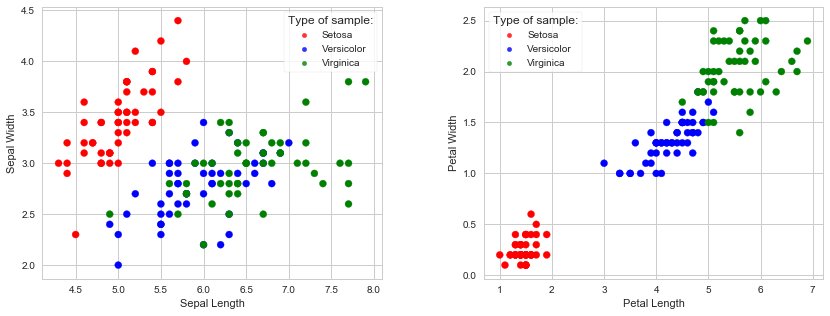

In [3]:
# Defining the figure for plotting, and splitting the plot in two plots
fig = plt.figure(figsize=(14, 5))
fig.subplots_adjust(wspace=0.3)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Adding a color dictionary to separate the colors per the species
colorSet = {'Iris-setosa':'r', 'Iris-versicolor':'b', 'Iris-virginica':'g'}

# Sepal plot:
ax1.scatter(df['sepal_length'], df['sepal_width'],  marker='o', c=[colorSet[i] for i in df['class']], label=None)
ax1.set_xlabel('Sepal Length')
ax1.set_ylabel('Sepal Width')

# Petal plot:
ax2.scatter(df['petal_length'], df['petal_width'],  marker='o', c=[colorSet[i] for i in df['class']], label=None)
ax2.set_xlabel('Petal Length')
ax2.set_ylabel('Petal Width');

# Adding the legend for both plots
for i in (ax1, ax2):
    for name, color in zip(['Setosa', 'Versicolor', 'Virginica'], ['r', 'b', 'g']):
        i.scatter([], [], alpha=0.8, s=20, c=color, label=name)   

    pst = i.legend(loc='best', scatterpoints=1, frameon=True, fontsize='10',labelspacing=0.5, title='Type of sample:');

Next step is to add a column with numbers corresponding to classes. Machine learning algorithms work better with numbers, even though it is possible to use strings. Adding the numbers will also make calculation of decision boundaries easier.

In [4]:
condList = [
    (df['class'] == 'Iris-setosa'),
    (df['class'] == 'Iris-versicolor'),
    (df['class'] == 'Iris-virginica')]
choiceList = [0, 1, 2]
df['clNum'] = np.select(condList, choiceList)

# Checking the DataFrame
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class,clNum
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


#### Using scikit-learn for k-NN Classifier
Now we can create a machine learning model to predict the species of iris. To do that, we need to split the imported data in two sets: one set that we will train the model on, and the second set (that the model hasn't seen) we will use to predict the species. 

Scikit-learn has a function called __train_test_split__ for shuffling and splitting the database in the given percentage. It divides the set to train and test sets. Scikit-learn requires numpy arrays.

In [5]:
# Importing train_test_split
from sklearn.model_selection import train_test_split

# matrix X and target vector y
X = np.array(df.iloc[:, 0:4])
y = np.array(df['clNum'])

# Creating training and test sets. Using 0.5 split, and random_state for repeatability of the test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=4)

The data is split in two equal lengths of 75 instances. We can use the training set to train the model, but in that case, for our model, we are using only the half of the dataset. The other half is not used for predictions. To be able to include both sets, we can actually use two-fold cross validation. Each set alternatively is used as a validation set. The accuracy score can be later combined (taking the mean), to get a better measure of model performance.

KNeighborsClassifier uses __n_neighbors = 5__ by default. Also the distance is calculated by __Minkowski Distance__, which is defined by $\left( \sum_{i=1}^{n} |x-y|^{p}\right)^{1/p}$, and with p=2 (default value) is equivalent to the standard __Euclidean metric__.

In [6]:
# Importing KNeighborsClassifier and Accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Creating the model
model = KNeighborsClassifier(n_neighbors=3)

# Using both sets to fit the model and predict
yTest_model = model.fit(X_train, y_train).predict(X_test)
yTrain_model = model.fit(X_test, y_test).predict(X_train)

# Accuracy scores
accuracy_score(y_test, yTest_model), accuracy_score(y_train, yTrain_model)

(0.95999999999999996, 0.97333333333333338)

#### Optimum k value

We can calculate the optimum k parameter for the given example. We will be using scikit-learn's __cross_val_score__ function with five-fold cross validation and the odd range of k-s from 1 to 21.

In [7]:
# Importing cross_val_score
from sklearn.model_selection import cross_val_score

# List of k numbers
kList = np.arange(1, 22)

# Array for storing mean values of calculated scores
accScoresMean = []

# Calculating for odd numbers of k
for k in kList[::2]:
    model = KNeighborsClassifier(n_neighbors=k)
    accScores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    accScoresMean.append(accScores.mean())

We can now find the optimum value of k.

In [8]:
# We used odd k numbers for calculating means of accuracy scores.
# We need to multiply the index values by 2 to get the correct index for optimum k in the range of kList.
optimumK = kList[accScoresMean.index(np.max(accScoresMean)) * 2]
print('Best accuracy score of %0.4f is achieved with k = %.f.'%(np.max(accScoresMean), optimumK))

Best accuracy score of 0.9800 is achieved with k = 7.


#### The decision boundaries

The decision boundaries plot for the given example can be plotted with the calculated optimum k. In the following code sample Sepal data is assigned to X0 and X1 features, and the meshgrid is created from these values. Decision boundaries are then calculated and plotted with the scatter plot of Sepal data.

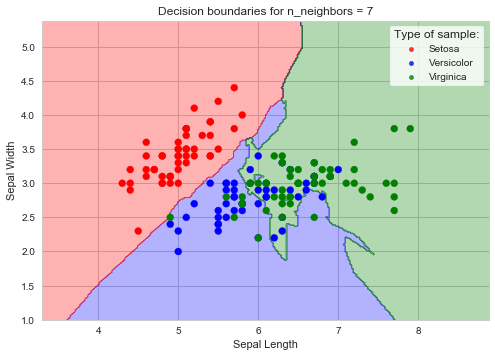

In [9]:
from matplotlib.colors import ListedColormap

cmapColor = ListedColormap(['r', 'b', 'g'])

# Method to create a mesh of points
def makeMeshgrid(x, y, h=0.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    # Meshgrid ndarrays
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    return xx, yy

# Defining the data to use in meshgrid calculation. Outputting xx and yy ndarrays
X0, X1 = X[:, 0], X[:, 1]
xx, yy = makeMeshgrid(X0, X1)

# Training the model per the optimum k value
model = KNeighborsClassifier(n_neighbors=optimumK)
model.fit(X_train[:, :2], y_train)

# Calculating the decision boundaries
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the decision boundaries
plt.contourf(xx, yy, Z, alpha = 0.3, cmap=cmapColor)

# Scatter plot Sepal width/length
plt.scatter(X0, X1,  marker='o', c=[colorSet[i] for i in df['class']], label=None)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

# Title
plt.title('Decision boundaries for n_neighbors = %.f'%(optimumK))

# Legend
for name, color in zip(['Setosa', 'Versicolor', 'Virginica'], ['r', 'b', 'g']):
        plt.scatter([], [], alpha=0.8, s=20, c=color, label=name)   

pst = plt.legend(loc='best', scatterpoints=1, frameon=True, fontsize='10',labelspacing=0.5, title='Type of sample:');